# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import datetime
%matplotlib notebook

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
now = datetime.datetime.now()

## Generate Cities List

In [41]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [42]:
#Creating base URL and empty dataframe
url = f'https://api.openweathermap.org/data/2.5/weather?APPID={api_key}&units=imperial&q='
data_df = pd.DataFrame({'City':[],
                        'Cloudiness':[],
                        'Country':[],
                        'Date':[],
                        'Humidity':[],
                        'Lat':[],
                        'Lng':[],
                        'Max_temp':[],
                        'Wind_speed':[]
                       })

In [43]:
#API request for each city and populating dataframe in the same loop
i = 0
for city in cities:    
    response_req = requests.get(url+city)
    response = response_req.json()

    if (response['cod'] == 200):
        i = i+1
        print(f'Processing Record {i} | {city}')
        print(response_req.url)
        data_df.loc[i,'City'] = city
        data_df.loc[i,'Cloudiness'] = response['clouds']['all']
        data_df.loc[i,'Country'] = response['sys']['country']
        data_df.loc[i,'Date'] = now.strftime("%Y-%m-%d") 
        data_df.loc[i,'Humidity'] = response['main']['humidity']
        data_df.loc[i,'Lat'] = response['coord']['lat']
        data_df.loc[i,'Lng'] = response['coord']['lon']
        data_df.loc[i,'Max_temp'] = response['main']['temp_max']
        data_df.loc[i,'Wind_speed'] = response['wind']['speed']
    else:
        print('City not found. Skipping')
            
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

Processing Record 1 | kutum
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=kutum
Processing Record 2 | rikitea
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=rikitea
Processing Record 3 | butaritari
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=butaritari
Processing Record 4 | olhao
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=olhao
Processing Record 5 | chokurdakh
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=chokurdakh
Processing Record 6 | faya
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=faya
Processing Record 7 | ushuaia
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=ushuaia
Processi

Processing Record 57 | kavieng
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=kavieng
Processing Record 58 | mattru
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=mattru
Processing Record 59 | nikolskoye
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=nikolskoye
Processing Record 60 | kapaa
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=kapaa
Processing Record 61 | ostrovnoy
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=ostrovnoy
Processing Record 62 | mangrol
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=mangrol
Processing Record 63 | taoudenni
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=t

Processing Record 112 | nador
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=nador
City not found. Skipping
Processing Record 113 | rajura
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=rajura
Processing Record 114 | camacupa
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=camacupa
Processing Record 115 | constitucion
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=constitucion
Processing Record 116 | iturama
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=iturama
Processing Record 117 | ulagan
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=ulagan
Processing Record 118 | clyde river
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af57

Processing Record 166 | mar del plata
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=mar%20del%20plata
Processing Record 167 | tahe
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=tahe
Processing Record 168 | seoul
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=seoul
Processing Record 169 | vila franca do campo
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=vila%20franca%20do%20campo
Processing Record 170 | coquimbo
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=coquimbo
Processing Record 171 | mabai
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=mabai
Processing Record 172 | champerico
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2d

Processing Record 221 | huntly
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=huntly
Processing Record 222 | semme
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=semme
Processing Record 223 | sisimiut
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=sisimiut
Processing Record 224 | saint-pierre
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=saint-pierre
Processing Record 225 | batagay-alyta
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=batagay-alyta
City not found. Skipping
Processing Record 226 | rio gallegos
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=rio%20gallegos
Processing Record 227 | nome
https://api.openweathermap.org/data/2.5/weather?APPI

Processing Record 276 | oak ridge
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=oak%20ridge
Processing Record 277 | bonfim
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=bonfim
Processing Record 278 | mount gambier
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=mount%20gambier
Processing Record 279 | noyabrsk
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=noyabrsk
Processing Record 280 | guerrero negro
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=guerrero%20negro
City not found. Skipping
Processing Record 281 | axochiapan
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=axochiapan
Processing Record 282 | muzhi
https://api.openweathermap.org/data/2.5

Processing Record 331 | avera
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=avera
Processing Record 332 | melchor de mencos
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=melchor%20de%20mencos
Processing Record 333 | alice springs
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=alice%20springs
Processing Record 334 | gijon
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=gijon
City not found. Skipping
Processing Record 335 | mae sai
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=mae%20sai
Processing Record 336 | boralday
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=boralday
Processing Record 337 | noshiro
https://api.openweathermap.org/data/2.5/weath

Processing Record 386 | margate
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=margate
Processing Record 387 | abonnema
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=abonnema
Processing Record 388 | gorele
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=gorele
Processing Record 389 | coihaique
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=coihaique
Processing Record 390 | meulaboh
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=meulaboh
Processing Record 391 | innisfail
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=innisfail
Processing Record 392 | kampot
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=im

Processing Record 442 | talcahuano
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=talcahuano
Processing Record 443 | la ligua
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=la%20ligua
Processing Record 444 | los llanos de aridane
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=los%20llanos%20de%20aridane
Processing Record 445 | middelburg
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=middelburg
Processing Record 446 | jalu
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=jalu
Processing Record 447 | slupca
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=slupca
Processing Record 448 | buraydah
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51a

Processing Record 497 | port shepstone
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=port%20shepstone
Processing Record 498 | ormara
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=ormara
Processing Record 499 | canico
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=canico
Processing Record 500 | parry sound
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=parry%20sound
Processing Record 501 | nizhniy kislyay
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=nizhniy%20kislyay
Processing Record 502 | azle
https://api.openweathermap.org/data/2.5/weather?APPID=e16c51aee2dc6af579aad79da42fc40c&units=imperial&q=azle
Processing Record 503 | passo de camaragibe
https://api.openweathermap.org/data/2.5/weather?APPID=e16c

In [45]:
data_df.count()

City          534
Cloudiness    534
Country       534
Date          534
Humidity      534
Lat           534
Lng           534
Max_temp      534
Wind_speed    534
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [46]:
data_df.to_csv('weather_data.csv')
data_df.head()

City  Cloudiness Country        Date  Humidity    Lat     Lng  \
1       kutum         0.0      SD  2019-03-31      26.0  14.20   24.66   
2     rikitea        36.0      PF  2019-03-31     100.0 -23.12 -134.97   
3  butaritari        88.0      KI  2019-03-31     100.0   3.07  172.79   
4       olhao        75.0      PT  2019-03-31      87.0  37.03   -7.84   
5  chokurdakh         0.0      RU  2019-03-31      96.0  70.62  147.90   

   Max_temp  Wind_speed  
1     59.24       10.67  
2     76.79       16.82  
3     80.93        9.55  
4     59.00        3.36  
5     21.35        4.97

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

<IPython.core.display.Javascript object>


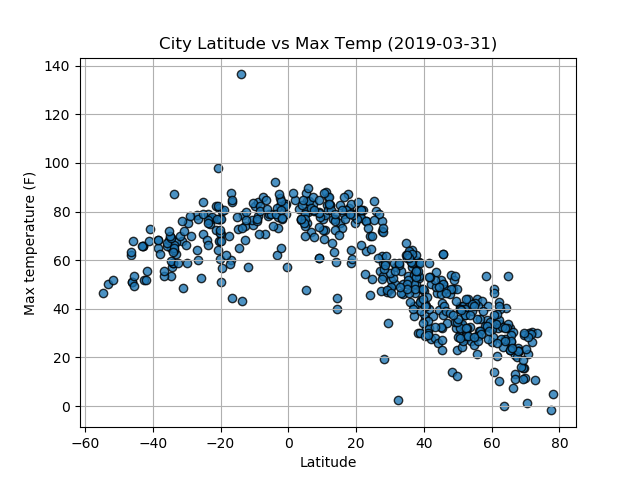

In [47]:
plt.figure()
plt.scatter(data_df['Lat'],data_df['Max_temp'], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.title(f"City Latitude vs Max Temp ({data_df.iloc[0]['Date']})")
plt.savefig('LatvsTemp.png')

#### Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


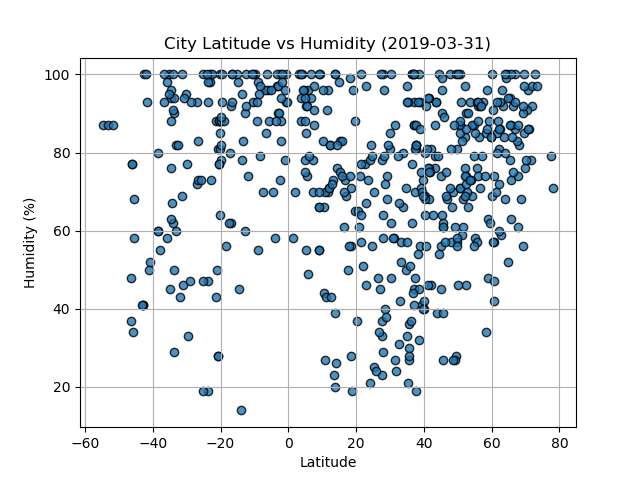

In [49]:
plt.figure()
plt.scatter(data_df['Lat'],data_df['Humidity'], edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs Humidity ({data_df.iloc[0]['Date']})")
plt.savefig('LatvsHumidity.png')

#### Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


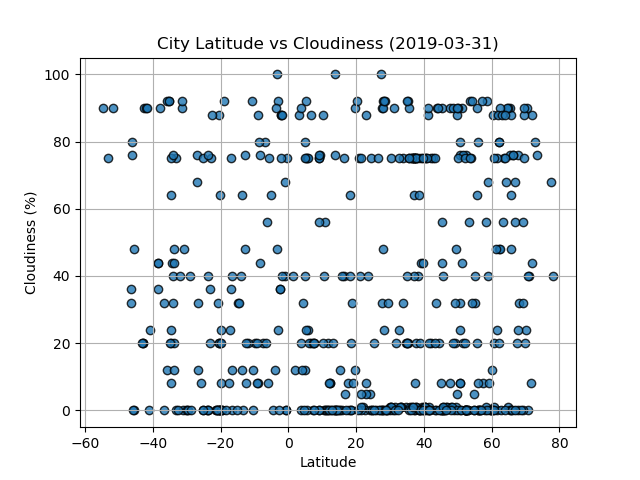

In [51]:
plt.figure()
plt.scatter(data_df['Lat'],data_df['Cloudiness'], edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs Cloudiness ({data_df.iloc[0]['Date']})")
plt.savefig('LatvsCloudiness.png')

#### Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


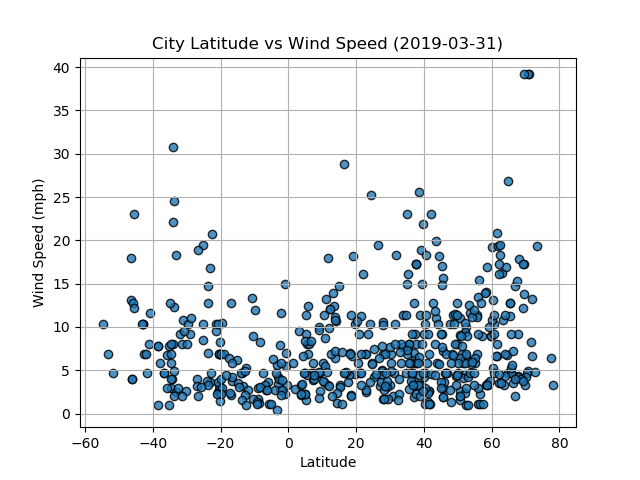

In [52]:
plt.figure()
plt.scatter(data_df['Lat'],data_df['Wind_speed'], edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")
            
            
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"City Latitude vs Wind Speed ({data_df.iloc[0]['Date']})")
plt.savefig('LatvsWindSpeed.png')